In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk

In [2]:
%matplotlib widget

In [3]:
savedir = r"C:\Users\lesliec\OneDrive - Allen Institute\Shared Documents - Lab 328\BrainStim\brain figure\slice images"

In [4]:
histology_loc = r"P:\tissuecyte\657902"

hist_files = {}
hist_vols = {}
for coli in ['red', 'blue', 'green']:
    tempfile = os.path.join(histology_loc, 'resampled_' + coli + '.mhd')
    hist_files[coli] = tempfile
    tempimage = sitk.ReadImage(tempfile)
    hist_vols[coli] = sitk.GetArrayFromImage(tempimage).T

### Test changing color

In [54]:
rgb_levels2 = [[400, 1100], [0, 700], [0, 700]]
level_adjusted_arrays = []
for colori, int_level in zip(['red', 'blue', 'green'], rgb_levels2):
    colarray = np.clip(hist_vols[colori], a_min=int_level[0] + 200, a_max=int_level[1]) - int_level[0]
    colarray = (colarray * 255. / (int_level[1] - int_level[0])).astype('uint8')
    level_adjusted_arrays.append(colarray)
color_volume2 = np.stack(level_adjusted_arrays, axis=-1)

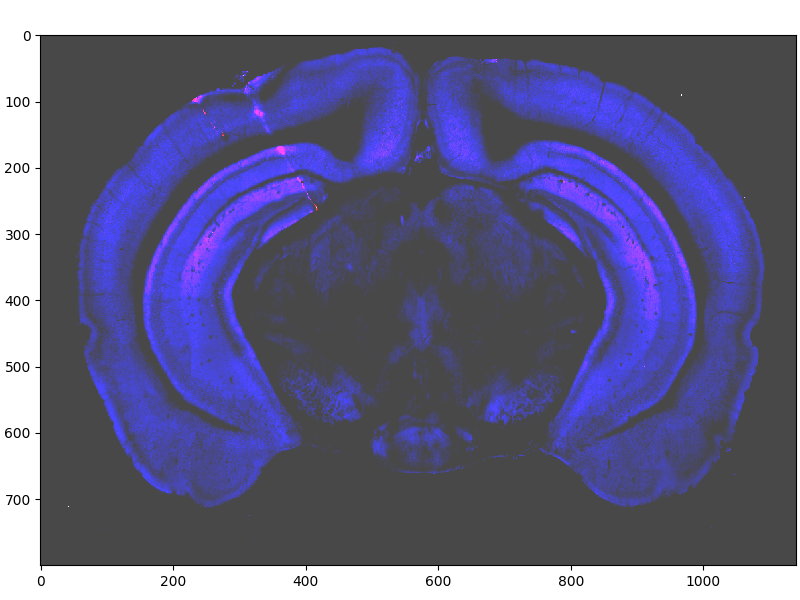

In [57]:
APslice = 810
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
img = ax.imshow(color_volume2[APslice,:,:,:], interpolation='none')#, vmin=0, vmax=100)

## Save ##
figname = 'mouse657902_VIS_stim_slice{}_high.png'.format(APslice)
fig.savefig(os.path.join(savedir, figname), transparent=False, dpi=300)

In [56]:
print(color_volume2[APslice,10,10,:])

[72 72 72]


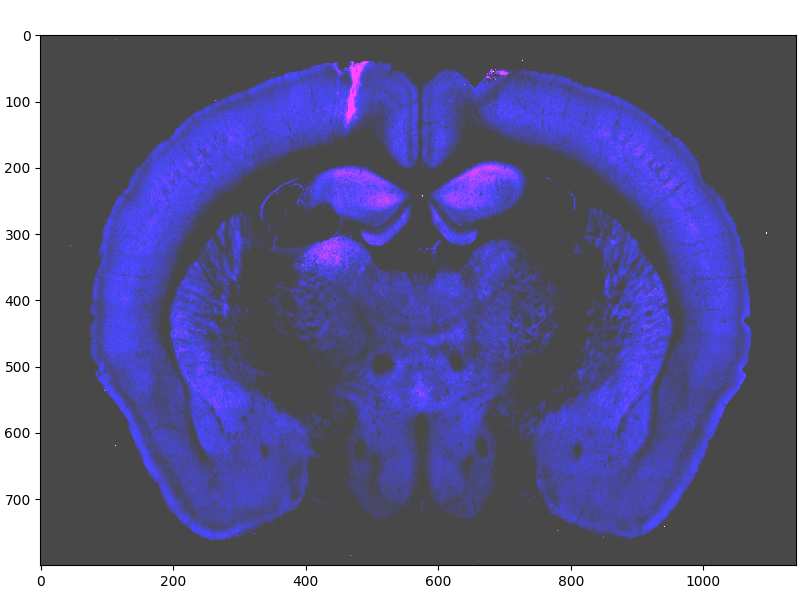

In [58]:
APslice = 640
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
img = ax.imshow(color_volume2[APslice,:,:,:], interpolation='none')#, vmin=0, vmax=100)

## Save ##
figname = 'mouse657902_HIP_slice{}_high.png'.format(APslice)
fig.savefig(os.path.join(savedir, figname), transparent=False, dpi=300)